In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# File to Load
data_covid = "./ca_data_jul20-jul21.csv"

# Read Data File and store into Pandas DataFrames
covid_data = pd.read_csv(data_covid)
covid_data.head()

,date,county,state,cases,deaths
0,2020-07-01,Alameda,California,6177,136.0
1,2020-07-01,Alpine,California,1,0.0
2,2020-07-01,Amador,California,22,0.0
3,2020-07-01,Butte,California,189,2.0
4,2020-07-01,Calaveras,California,40,0.0


In [2]:
# Read Data File and store into Pandas DataFrame
data_population = "./population_estimate_07_21.csv"
population_data = pd.read_csv(data_population)
population_data.head()

,county,population
0,Alameda,1648556.0
1,Alpine,1235.0
2,Amador,41259.0
3,Butte,208309.0
4,Calaveras,46221.0


In [3]:
# Read Data File and store into Pandas DataFrame
data_area =  "./area_california_counties.csv"
area_data = pd.read_csv(data_area)
area_data.head()

,county,area
0,San Bernardino,20057.0
1,Inyo,10181.0
2,Kern,8132.0
3,Riverside,7206.0
4,Siskiyou,6278.0


In [4]:
# Combine the data into a single dataframe

data_complete = pd.merge(covid_data, population_data, on = ('county', 'county'))
data_complete = pd.merge(data_complete, area_data, on = ('county', 'county'))
data_complete.head()


,date,county,state,cases,deaths,population,area
0,2020-07-01,Alameda,California,6177,136.0,1648556.0,739.0
1,2020-07-02,Alameda,California,6405,138.0,1648556.0,739.0
2,2020-07-03,Alameda,California,6493,140.0,1648556.0,739.0
3,2020-07-04,Alameda,California,6577,140.0,1648556.0,739.0
4,2020-07-05,Alameda,California,6876,140.0,1648556.0,739.0


In [5]:
# Create a dataframe which has the ending numbers of cases and deaths in our selected period which is grouped according to county
end = data_complete.groupby('county').max()
end.head()

,date,state,cases,deaths,population,area
county,,,,,,
Alameda,2021-06-30,California,90297,1693.0,1648556.0,739.0
Alpine,2021-06-30,California,89,0.0,1235.0,738.0
Amador,2021-06-30,California,3753,47.0,41259.0,595.0
Butte,2021-06-30,California,12697,201.0,208309.0,1636.0
Calaveras,2021-06-30,California,2210,56.0,46221.0,1020.0


In [6]:
# Create a dataframe which has the beginning numbers of cases and deaths in our selected period which is grouped according to county
beginning = data_complete.groupby('county').min()
beginning.head()

,date,state,cases,deaths,population,area
county,,,,,,
Alameda,2020-07-01,California,6177,136.0,1648556.0,739.0
Alpine,2020-07-01,California,1,0.0,1235.0,738.0
Amador,2020-07-01,California,22,0.0,41259.0,595.0
Butte,2020-07-01,California,189,2.0,208309.0,1636.0
Calaveras,2020-07-01,California,40,0.0,46221.0,1020.0


In [7]:
# Creating two new columns which are calculating the numbers of cases and deaths just in our sellected period
end['cases in timeframe'] = end['cases'] - beginning['cases']
end['deaths in timeframe'] = end['deaths'] - beginning['deaths']
end['density'] = round(end['population'] / end['area'], 2)
end.head()

,date,state,cases,deaths,population,area,cases in timeframe,deaths in timeframe,density
county,,,,,,,,,
Alameda,2021-06-30,California,90297,1693.0,1648556.0,739.0,84120,1557.0,2230.79
Alpine,2021-06-30,California,89,0.0,1235.0,738.0,88,0.0,1.67
Amador,2021-06-30,California,3753,47.0,41259.0,595.0,3731,47.0,69.34
Butte,2021-06-30,California,12697,201.0,208309.0,1636.0,12508,199.0,127.33
Calaveras,2021-06-30,California,2210,56.0,46221.0,1020.0,2170,56.0,45.31


In [8]:
# Finding the top 5 countries according to number of cases
top_counties_cases= end.nlargest(5, 'cases in timeframe')
top_counties_cases = top_counties_cases.drop(columns=['date', 'state','cases','deaths','deaths in timeframe','population','area', 'density'])
top_counties_cases

,cases in timeframe
county,
Los Angeles,1145401
San Bernardino,287017
Riverside,283143
San Diego,267876
Orange,259148


In [9]:
# Finding the top 5 countries according to number of deaths
top_counties_deaths = end.nlargest(5, 'deaths in timeframe')
top_counties_deaths = top_counties_deaths.drop(columns=['date', 'state','cases','deaths','cases in timeframe','population','area', 'density'])
top_counties_deaths

,deaths in timeframe
county,
Los Angeles,21096.0
Orange,4779.0
San Bernardino,4682.0
Riverside,4173.0
San Diego,3408.0


In [10]:
# Finding the bottom 5 countries according to number of cases
bottom_counties_cases = end.nsmallest(5, 'cases in timeframe')
bottom_counties_cases = bottom_counties_cases.drop(columns=['date', 'state','cases','deaths','deaths in timeframe','population','area', 'density'])
bottom_counties_cases

,cases in timeframe
county,
Sierra,58
Alpine,88
Trinity,339
Mariposa,440
Modoc,564


In [11]:
# Finding the bottom 5 countries according to number of deaths
bottom_counties_deaths = end.nsmallest(5, 'deaths in timeframe')
bottom_counties_deaths = bottom_counties_deaths.drop(columns=['date', 'state','cases','deaths','cases in timeframe','population','area', 'density'])
bottom_counties_deaths

,deaths in timeframe
county,
Alpine,0.0
Sierra,0.0
Mono,3.0
Modoc,5.0
Trinity,5.0


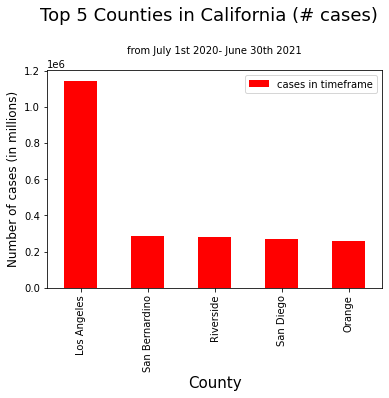

In [12]:
# Graphing Top 5 Counties in California according to number of cases in choosen period
plot = top_counties_cases.plot(kind = 'bar', color="red")
plot.set_xlabel("County", fontsize=15)
plot.set_ylabel("Number of cases (in millions)",x=3, fontsize=12)
plt.suptitle("Top 5 Counties in California (# cases)",y=1.1, fontsize=18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/top_counties_cases.png")

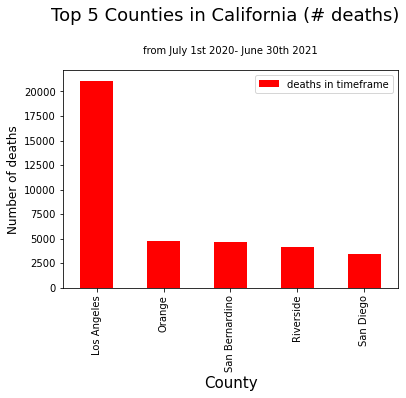

In [13]:
# Graphing Top 5 Counties in California according to number of deaths in choosen period
plot = top_counties_deaths.plot(kind = 'bar', color= 'red')
plot.set_xlabel("County",fontsize = 15)
plot.set_ylabel("Number of deaths",x=3, fontsize=12)
plt.suptitle("Top 5 Counties in California (# deaths)",y=1.1, fontsize=18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/top_counties_deaths.png")

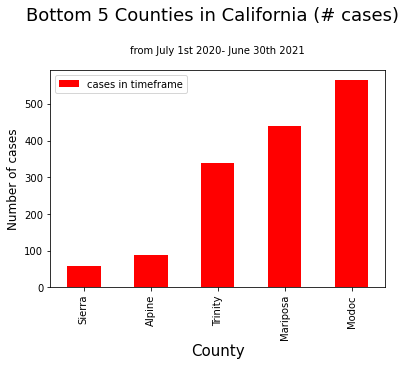

In [14]:
# Graphing Bottom 5 Counties in California according to number of cases in choosen period
plot = bottom_counties_cases.plot(kind = 'bar', color="red")
plot.set_xlabel("County", fontsize=15)
plot.set_ylabel("Number of cases", x=3, fontsize = 12)
plt.suptitle("Bottom 5 Counties in California (# cases)", y = 1.1, fontsize = 18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/bottom_counties_cases.png")

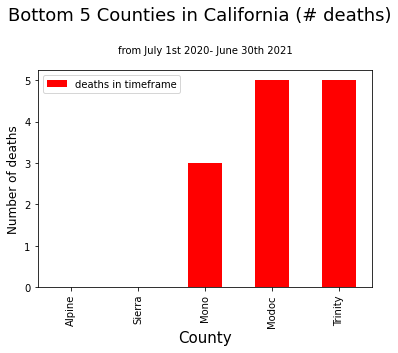

In [15]:
# Graphing Bottom 5 Counties in California according to number of deaths in choosen period
plot = bottom_counties_deaths.plot(kind = 'bar', color = 'red')
plot.set_xlabel("County", fontsize = 15)
plot.set_ylabel("Number of deaths", x=3, fontsize = 12)
plt.suptitle("Bottom 5 Counties in California (# deaths)", y = 1.1, fontsize = 18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/bottom_counties_deaths.png")

The correlation between cases and deaths is 1.0


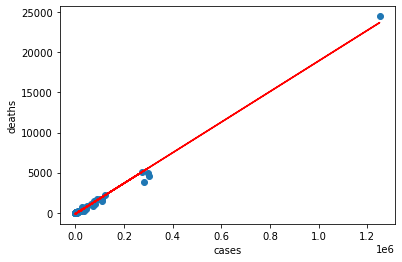

In [16]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['cases']

y_axis = end['deaths']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.xlabel('cases')
plt.ylabel('deaths')
plt.plot(x_axis,regress_values, "r-")
#plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

print(f'The correlation between cases and deaths is {round(correlation[0],2)}')

plt.savefig("./Images/plot_cases_deaths.png")

The correlation between cases and population is 0.98


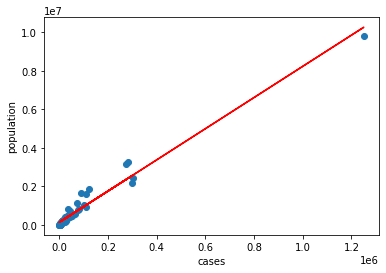

In [17]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['cases']

y_axis = end['population']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.xlabel('cases')
plt.ylabel('population')
plt.plot(x_axis,regress_values, "r-")
#plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

print(f'The correlation between cases and population is {round(correlation[0],2)}')

plt.savefig("./Images/plot_cases_population.png")

The correlation between cases and area is 0.25


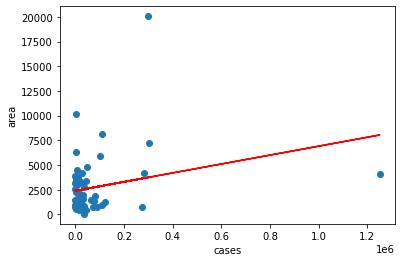

In [18]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['cases']

y_axis = end['area']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.xlabel('cases')
plt.ylabel('area')
plt.plot(x_axis,regress_values, "r-")

print(f'The correlation between cases and area is {round(correlation[0],2)}')

plt.savefig("./Images/plot_cases_area.png")

The correlation between deaths and population is 0.97


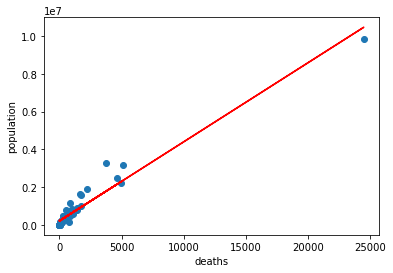

In [19]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['deaths']

y_axis = end['population']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.xlabel('deaths')
plt.ylabel('population')
plt.plot(x_axis,regress_values, "r-")

print(f'The correlation between deaths and population is {round(correlation[0],2)}')

plt.savefig("./Images/plot_deaths_population.png")

The correlation between deaths and area is 0.22


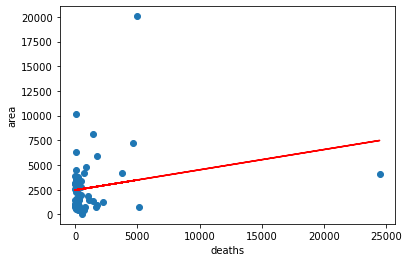

In [20]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['deaths']

y_axis = end['area']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.xlabel('deaths')
plt.ylabel('area')
plt.plot(x_axis,regress_values, "r-")

print(f'The correlation between deaths and area is {round(correlation[0],2)}')

plt.savefig("./Images/plot_deaths_area.png")

The correlation between population and area is 0.2


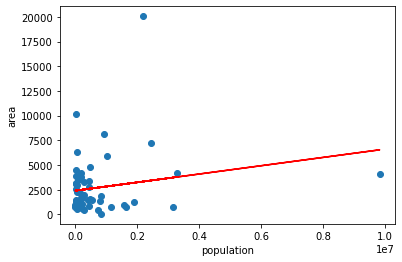

In [21]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['population']

y_axis = end['area']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.xlabel('population')
plt.ylabel('area')
plt.plot(x_axis,regress_values, "r-")

print(f'The correlation between population and area is {round(correlation[0],2)}')

plt.savefig("./Images/plot_population_area.png")

The correlation between cases and density is 0.15


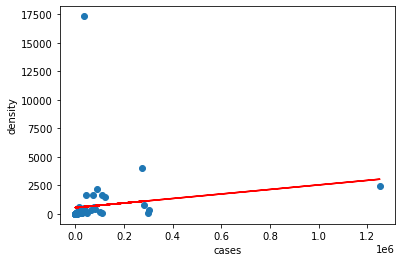

In [22]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['cases']

y_axis = end['density']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.xlabel('cases')
plt.ylabel('density')
plt.plot(x_axis,regress_values, "r-")

print(f'The correlation between cases and density is {round(correlation[0],2)}')

plt.savefig("./Images/plot_cases_density.png")

The correlation between deaths and density is 0.15


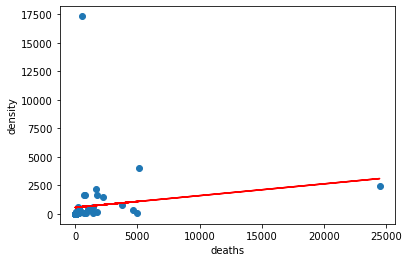

In [23]:
# Calculate the correlation coefficient and linear regression model 

x_axis = end['deaths']

y_axis = end['density']

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.xlabel('deaths')
plt.ylabel('density')
plt.plot(x_axis,regress_values, "r-")

print(f'The correlation between deaths and density is {round(correlation[0],2)}')

plt.savefig("./Images/plot_deaths_density.png")